# 1. 전체 데이터 필요한 정보만 가져오기
- 상품명, 은행명, 가입 편의성(방법 개수), 우대조건 여부

In [15]:
import json

In [14]:
with open('data/financial_data.json', 'r', encoding='utf-8') as file:
    raw_data = json.load(file)
    
    # 2. 복잡한 구조에서 필요한 정보만 뽑기
    products = []

    # 모든 상품 유형 처리
    product_types = ['bank_deposits', 'bank_savings', 'mortgage_loans', 'rent_loans', 'credit_loans']
    
    for product_type in product_types:
        product_list = raw_data['products'][product_type]['result']['baseList']
    
        for product in product_list:
            # 복잡한 정보를 간단하게 정리
            clean_product = {
                'name': product['fin_prdt_nm'],      # 상품명
                'bank': product['kor_co_nm'],        # 은행명
                'convenience': len(product['join_way'].split(',')),  # 가입 편의성 (방법 개수)
                'has_benefits': '우대' in product.get('etc_note', ''),  # 우대조건 여부
            }
            products.append(clean_product)
print(len(products))
print(products)

222
[{'name': 'WON플러스예금', 'bank': '우리은행', 'convenience': 3, 'has_benefits': False}, {'name': 'e-그린세이브예금', 'bank': '한국스탠다드차타드은행', 'convenience': 2, 'has_benefits': False}, {'name': 'iM주거래우대예금(첫만남고객형)', 'bank': '아이엠뱅크', 'convenience': 3, 'has_benefits': False}, {'name': 'iM행복파트너예금(일반형)', 'bank': '아이엠뱅크', 'convenience': 3, 'has_benefits': False}, {'name': 'iM함께예금', 'bank': '아이엠뱅크', 'convenience': 3, 'has_benefits': False}, {'name': 'iM스마트예금', 'bank': '아이엠뱅크', 'convenience': 2, 'has_benefits': False}, {'name': 'LIVE정기예금', 'bank': '부산은행', 'convenience': 2, 'has_benefits': False}, {'name': '더(The) 특판 정기예금', 'bank': '부산은행', 'convenience': 2, 'has_benefits': False}, {'name': '더(The) 레벨업 정기예금', 'bank': '부산은행', 'convenience': 1, 'has_benefits': False}, {'name': '미즈월복리정기예금', 'bank': '광주은행', 'convenience': 4, 'has_benefits': False}, {'name': '스마트모아Dream정기예금', 'bank': '광주은행', 'convenience': 2, 'has_benefits': False}, {'name': '굿스타트예금', 'bank': '광주은행', 'convenience': 1, 'has_benefits': False}, {'nam

# 2. 미국 연준 SCF 데이터

In [34]:
import pandas as pd
scf_data = pd.read_csv('data/SCFP/SCFP2022_한글.csv')
scf_data.head()

,연도,연도코드,가중치,가구주성별,연령,연령대분류,교육수준,교육수준분류,결혼상태,자녀수,...,순자산분류,소득분류,자산분류,순소득분류,순소득분류2,순자산백분위분류,소득백분위분류,순소득백분위분류,소득4분위분류,순소득4분위분류
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


In [35]:
selected_data = scf_data[[
    '연령',
    '총소득', '소득분류', '소득백분위분류', '소득4분위분류',
    '직업분류1', '직업분류2', '산업분류',
    '결혼상태', '자녀수', '가족구조',
    '총자산', '순자산', '자산분류', '순자산분류',
    '저축여부', '저축함',
    '주식보유여부', '비머니마켓펀드보유여부', '당좌예금보유여부',
    '현금가치생명보험보유여부', 'IRA계좌보유여부', '연금보유',
    '금융위험감수', '금융위험회피',
    '거래활동여부', '거래횟수', '주식보유수'
]]
selected_data.to_csv('data/SCFP/selected_SCFP2022_한글.csv')

c:\Project2\CodeDoc\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project2\CodeDoc\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project2\CodeDoc\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project2\CodeDoc\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project2\CodeDoc\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

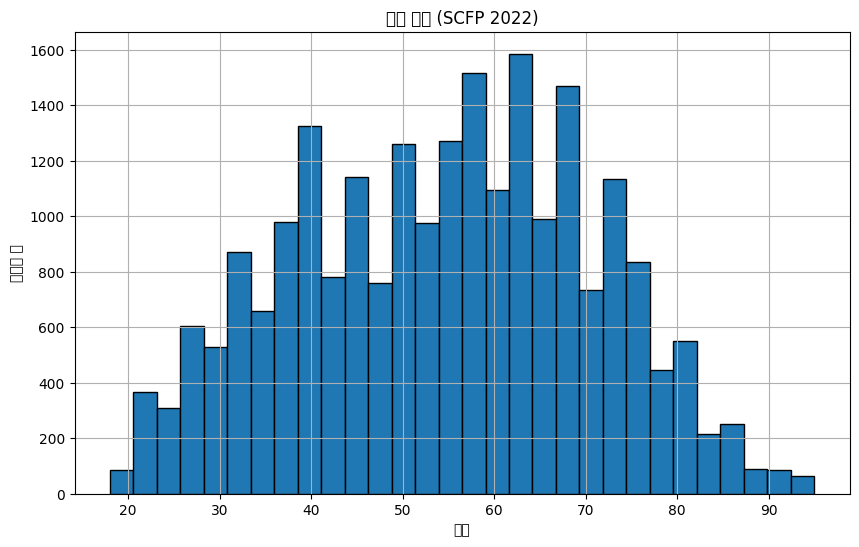

In [31]:
# 연령 분포
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기 (파일 경로는 실제 위치에 맞게 수정)
df = pd.read_csv("data/SCFP2022_한글.csv")

# 연령 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(df['연령'], bins=30, edgecolor='black')
plt.title('연령 분포 (SCFP 2022)')
plt.xlabel('연령')
plt.ylabel('응답자 수')
plt.grid(True)
plt.show()

In [38]:
df = pd.read_csv('data/SCFP/selected_SCFP2022_한글.csv')

In [45]:
for i in range(1, 10):
    filtered_data = df[(df['연령'] >= i*10) & (scf_data['연령'] < (i+1)*10)]

In [46]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 330 to 21209
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   연령            150 non-null    int64  
 2   총소득           150 non-null    float64
 3   소득분류          150 non-null    int64  
 4   소득백분위분류       150 non-null    int64  
 5   소득4분위분류       150 non-null    int64  
 6   직업분류1         150 non-null    int64  
 7   직업분류2         150 non-null    int64  
 8   산업분류          150 non-null    int64  
 9   결혼상태          150 non-null    int64  
 10  자녀수           150 non-null    int64  
 11  가족구조          150 non-null    int64  
 12  총자산           150 non-null    float64
 13  순자산           150 non-null    float64
 14  자산분류          150 non-null    int64  
 15  순자산분류         150 non-null    int64  
 16  저축여부          150 non-null    int64  
 17  저축함           150 non-null    int64  
 18  주식보유여부        150 non-null    i